In [47]:
import dash
from dash import dcc
from dash import html
import pandas as pd
from dash.dependencies import Output, Input
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas_bokeh
import pgeocode
import geopandas as gpd
from geopandas import GeoDataFrame
pandas_bokeh.output_notebook()
import plotly.graph_objects as go


%matplotlib inline

df = pd.read_csv('C:/Users/achot/Downloads/transactions.csv')

# Cleaning original data
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Removes Unnamed columns
df = df.astype({'Amount': 'float'})  # Convert column from string to float
df = df.astype({'Zip Code': 'str'})
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')  # Convert column to datetime

Loading BokehJS ...

In [20]:
#View Dataframe
df

,Date,Description,Amount,Address,City/State,Zip Code,Country,Category
0,2022-01-04,E-Payment,542.00,NaN,NaN,NaN,NaN,Housing
1,2022-01-04,UBER EATS SAN FRANCISCO CA,26.33,1455 MARKET ST\n-,SAN FRANCISCO\nCA,94103,UNITED STATES,Restaurants
2,2022-01-06,BT*TUTORS.COM AUSTIN TX,29.99,4609 TRL CRST CIR,AUSTIN\nTX,78735,UNITED STATES,Subscription
3,2022-01-09,MT FUJI SUSHI JAPANEMAPLEWOOD NJ,17.81,166 MAPLEWOOD AVE\nSTE A,MAPLEWOOD\nNJ,07040,UNITED STATES,Restaurants
4,2022-01-10,Audible audible.com NJ,15.66,1 WASHINGTON PARK,NEWARK\nNJ,07102-3122,UNITED STATES,Books
...,...,...,...,...,...,...,...,...
329,2022-12-25,NEW JERSEY E-Z PASS 888-288-6865 NJ,35.00,375 MCCARTER HWY,NEWARK\nNJ,07114-2562,UNITED STATES,Parking & Tolls
330,2022-12-27,STEAMPOWERED.COM,5.31,10400 NORTH EAST 4TH ST,BELLEVUE\nWA,98004,UNITED STATES,Entertainment
331,2022-12-30,MACYS SHORT HILLS 0SHORT HILLS NJ,208.75,KENNEDY PARKWAY WEST,SHORT HILLS\nNJ,07078,UNITED STATES,Clothing
332,2022-12-30,UMI SUSHI 0001 MILLBURN NJ,101.00,339 MILLBURN AVE,MILLBURN\nNJ,07041,UNITED STATES,Restaurants


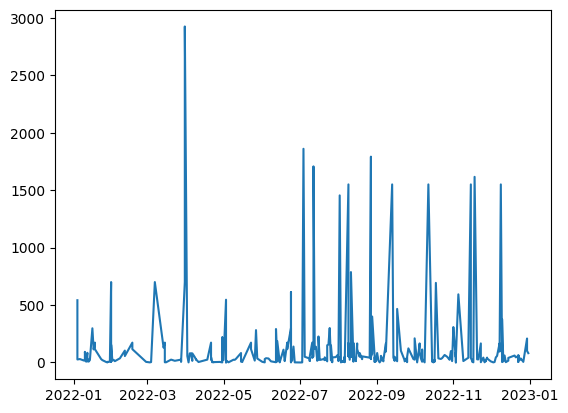

In [51]:
#Exploratory Data Analysis
x = df['Date']
y = df['Amount']
plt.plot(x,y)


<BarContainer object of 334 artists>

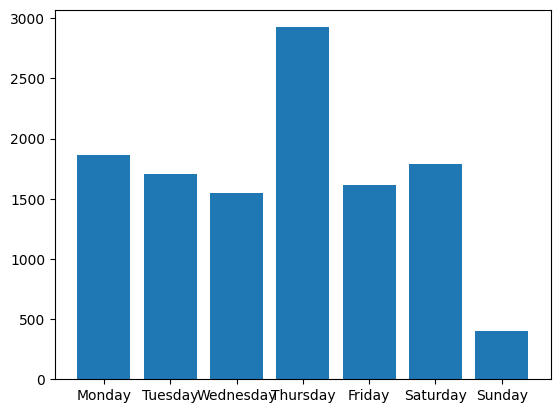

In [33]:
#Transform x variable to group by day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Date_of_Week'] = df['Date'].dt.day_name()
df['Date_of_Week'] = pd.Categorical(df['Date_of_Week'], categories=days_of_week, ordered=True)
df.sort_values(by='Date_of_Week', inplace=True)
x = df['Date_of_Week']
y = df['Amount']
plt.bar(x,y)

In [50]:
#Plot average amount spent by zipcode
nomi = pgeocode.Nominatim('us') #Interpret zipcodes as US

df['Latitude'] = (nomi.query_postal_code(df['Zip Code'].tolist()).latitude) #Create column that loads in the lattitude based on Zip Code
df['Longitude'] = (nomi.query_postal_code(df['Zip Code'].tolist()).longitude) #Create column that loads in the longitude based on Zip Code

fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['City/State'],
        mode = 'markers',
        marker_color = df['Amount'],
        ))

fig.update_layout(
        title = 'Spending by Zip Code',
        geo_scope='usa',
    )
fig.show()